# Road Lane Detection - Part 2

## Step 1: Import Libraries

We need:
- OpenCV for image processing
- NumPy for array operations
- Matplotlib for displaying images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Step 2: Load and Display Image

Load a road image and display it.

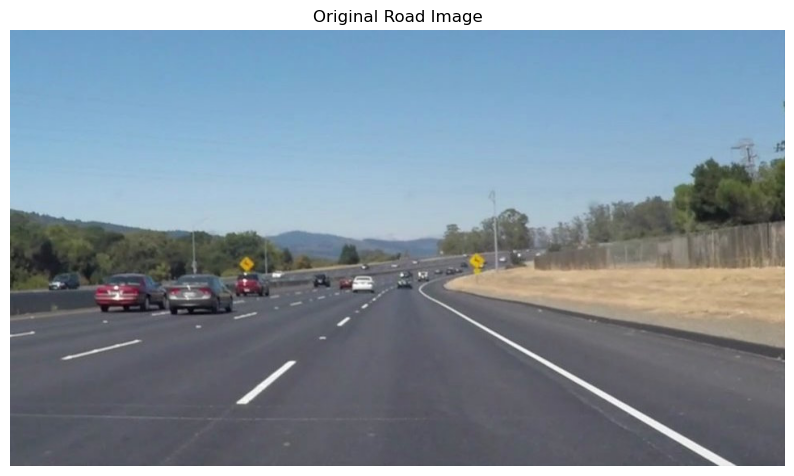

In [ ]:
image_path = 'images/input/road1.jpg'  
img = cv2.imread(image_path)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title('Original Road Image')
plt.axis('off')
plt.show()

## Step 3: Preprocessing

Convert to grayscale and apply median filter to smooth the image.

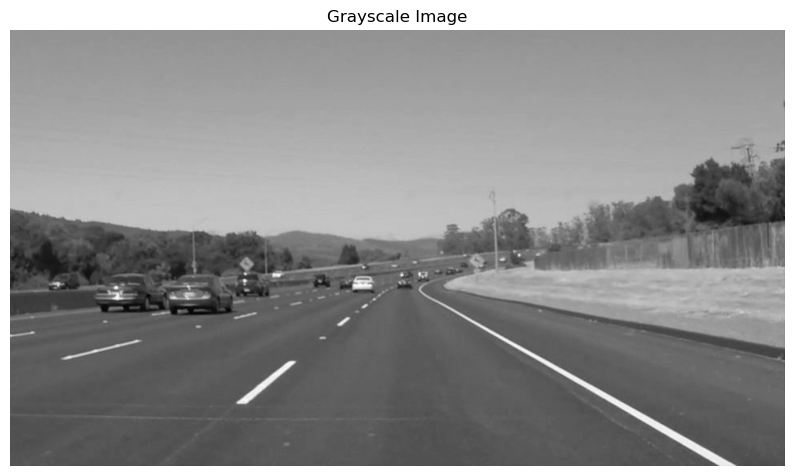

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

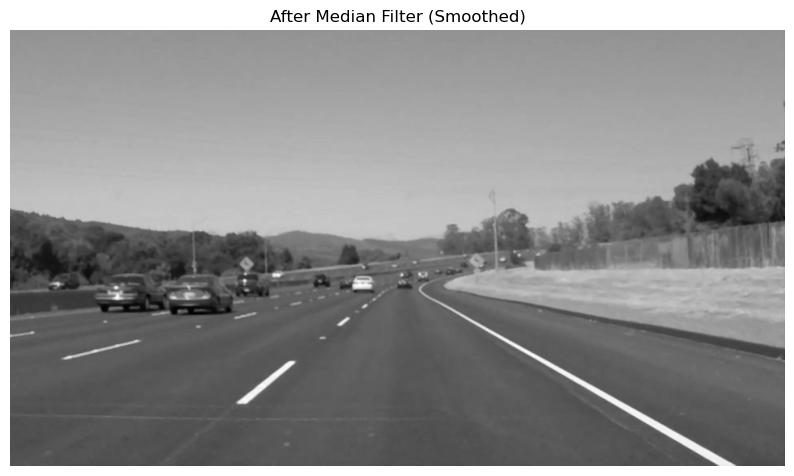

In [14]:
blur = cv2.medianBlur(gray, 3)

plt.figure(figsize=(10, 6))
plt.imshow(blur, cmap='gray')
plt.title('After Median Filter (Smoothed)')
plt.axis('off')
plt.show()

## Step 4: Edge Detection with Canny

Apply Canny edge detector with high thresholds to detect strong edges (lane lines).

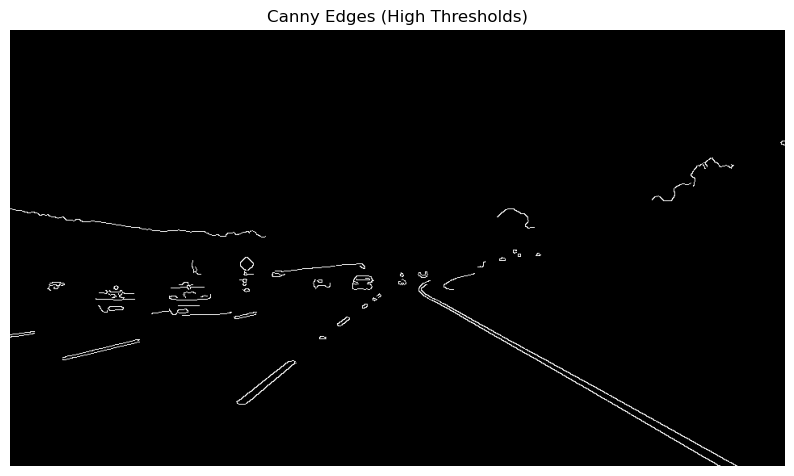

In [8]:
edges = cv2.Canny(blur, 150, 300)

plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges (High Thresholds)')
plt.axis('off')
plt.show()

## Step 5: Define Region of Interest (ROI)

Create a mask to focus only on the road area where lanes appear.
We'll use a trapezoidal shape that covers the lane region.

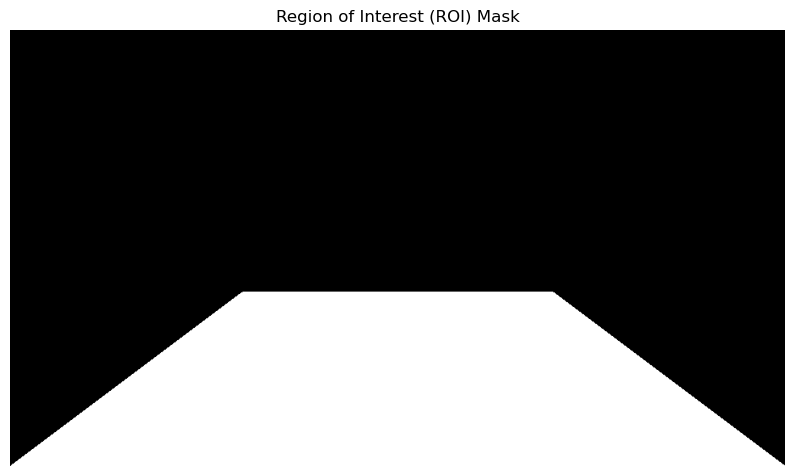

In [10]:
height, width = edges.shape

roi_vertices = np.array([
    [(0, height),                  # Bottom left
     (width*0.3, height*0.6),        # Top left (raised higher)
     (width*0.7, height*0.6),        # Top right (raised higher)
     (width, height)]            # Bottom right
], dtype=np.int32)

mask = np.zeros_like(edges) # blank mask
cv2.fillPoly(mask, roi_vertices, 255) # fill the ROI with white

plt.figure(figsize=(10, 6))
plt.imshow(mask, cmap='gray')
plt.title('Region of Interest (ROI) Mask')
plt.axis('off')
plt.show()

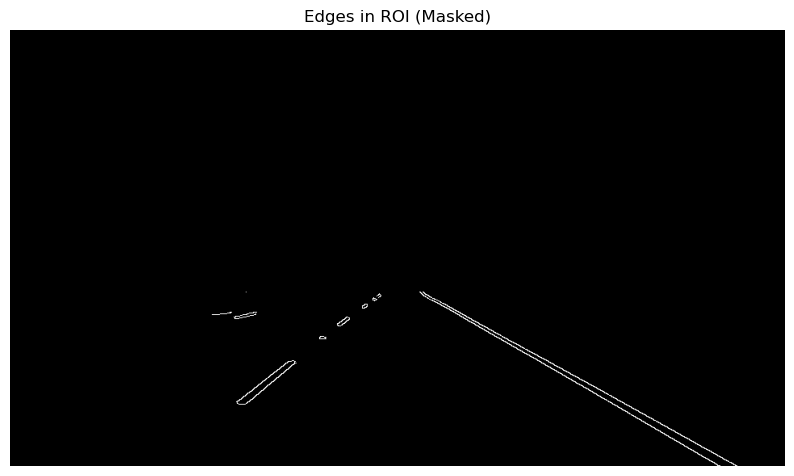

In [ ]:
roi_edges = cv2.bitwise_and(edges, mask)

plt.figure(figsize=(10, 6))
plt.imshow(roi_edges, cmap='gray')
plt.title('Edges in ROI (Masked)')
plt.axis('off')
plt.show()

## Step 6: Apply Hough Transform

Use Hough Transform to detect lines in the ROI edges.
This finds straight lines by looking for patterns in the edge pixels.

In [18]:
lines = cv2.HoughLinesP(
    roi_edges,
    rho=1,
    theta=np.pi/180,
    threshold=50,
    minLineLength=100,
    maxLineGap=60
)

if lines is not None:
    print(f"Detected {len(lines)} lines")
else:
    print("No lines detected")

Detected 7 lines


### Standard Hough Transform to visualize the accumulator

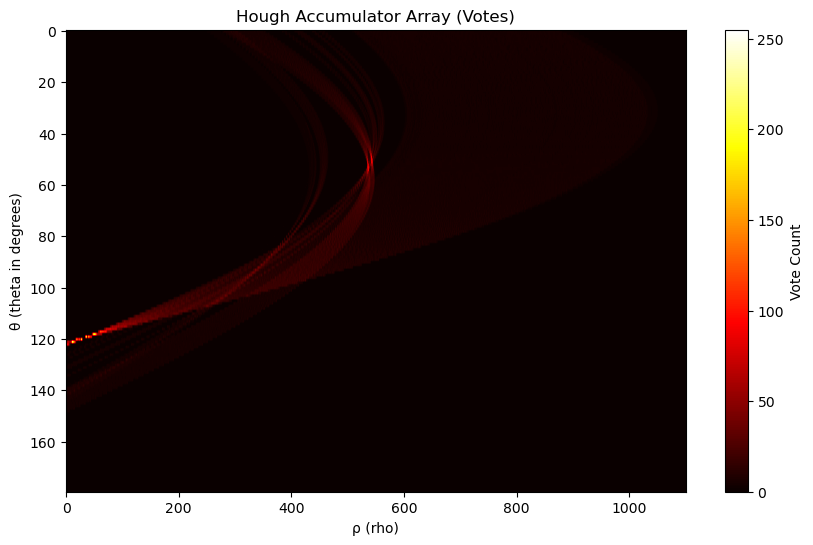

In [ ]:
rho = 1
theta = np.pi / 180
threshold = 50

lines_standard = cv2.HoughLines(roi_edges, rho, theta, threshold)

# build an accumulator visualization manually
accumulator = np.zeros((180, int(np.sqrt(roi_edges.shape[0]**2 + roi_edges.shape[1]**2))), dtype=np.uint8)

# perform Hough transform manually to visualize votes (approximation)

# compute edge coordinates
y_idxs, x_idxs = np.nonzero(roi_edges)  # get all edge (white pixel) coordinates

for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]
    for theta_i in range(180):
        rho_val = int(x * np.cos(np.deg2rad(theta_i)) + y * np.sin(np.deg2rad(theta_i)))
        if 0 <= rho_val < accumulator.shape[1]:
            accumulator[theta_i, rho_val] += 1

# normalize for display
accumulator_display = cv2.normalize(accumulator, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(10, 6))
plt.imshow(accumulator_display, cmap='hot', aspect='auto')
plt.title('Hough Accumulator Array (Votes)')
plt.xlabel('ρ (rho)')
plt.ylabel('θ (theta in degrees)')
plt.colorbar(label='Vote Count')
plt.show()


## Step 7: Draw Detected Lines

Draw the detected lines on the original image to visualize the lane detection.

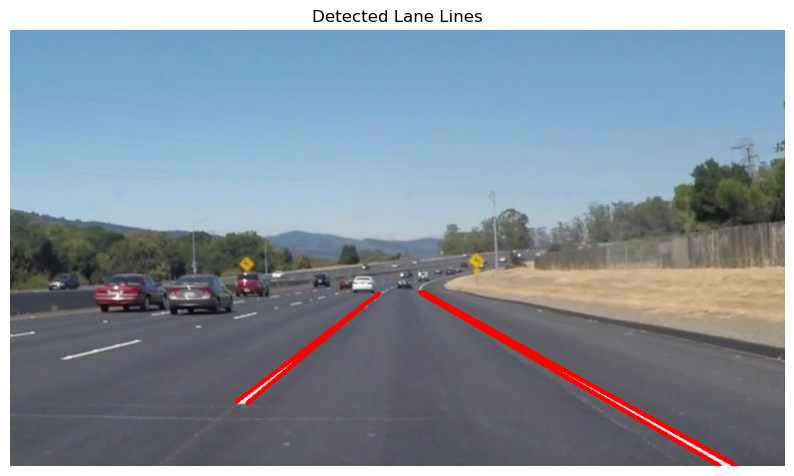

In [21]:
line_image = img.copy()

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 3)

line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(line_image_rgb)
plt.title('Detected Lane Lines')
plt.axis('off')
plt.show()

## Step 8: Save the Result

Save the final lane detection image to a file.

In [17]:
output_path = 'LD_output1.jpg'
cv2.imwrite(output_path, line_image)
print(f"Lane detection result saved as: {output_path}")

Lane detection result saved as: LD_output1.jpg


- road 1: median kernel 5:

 [(0, height),                  # Bottom left
     (width*0.3, height*0.6),        # Top left (raised higher)
     (width*0.7, height*0.6),        # Top right (raised higher)
     (width, height)]            # Bottom right


- road 3: median kernel 9:

[(0, height),                  # Bottom left
     (width*0.35, height*0.3),        # Top left (wider apart)
     (width*0.65, height*0.3),        # Top right (wider apart)
     (width, height)]  